In [1]:
#idea: get bottom 10 and top 10, compare them on tSNE
import wandb
api = wandb.Api()

In [26]:
import pandas as pd
run = api.run("randomwish/odys-latent/5ruhh3mc")
data = []
for i, row in run.history(samples=1000).iterrows(): #1000 because thats the size of molecules test set
    print(row)
    data.append({
        "_timestamp":row["_timestamp"],
        "index": i,
        "kl-div": row["kl-div"],
        "true-latent": row["true-latent"]["values"],
        "predicted-latent": row["predicted-latent"]["values"]
    })
df = pd.DataFrame(data)

true-latent         {'_type': 'histogram', 'values': [2, 2, 7, 24,...
_runtime                                                    10.975254
path                                                       A-1000.png
predicted-latent    {'packedBins': {'size': 0.8309330344200134, 'c...
predicted-image     {'_type': 'image-file', 'format': 'png', 'path...
index                                                               0
kl-div                                                       77.49575
true-image          {'size': 3962, 'height': 128, 'width': 128, '_...
_step                                                               0
_timestamp                                          1718204645.876055
Name: 0, dtype: object
true-latent         {'_type': 'histogram', 'values': [2, 2, 7, 15,...
_runtime                                                    11.556948
path                                                       A-1003.png
predicted-latent    {'values': [3, 0, 5, 27, 22, 33, 51, 105, 160,.

In [207]:
df_sorted = df.sort_values(by="kl-div")
SIZE = 500
PERPLEXITY = min(350,SIZE - 1)
top_ten = df_sorted.head(SIZE)
bottom_ten = df_sorted.tail(SIZE)


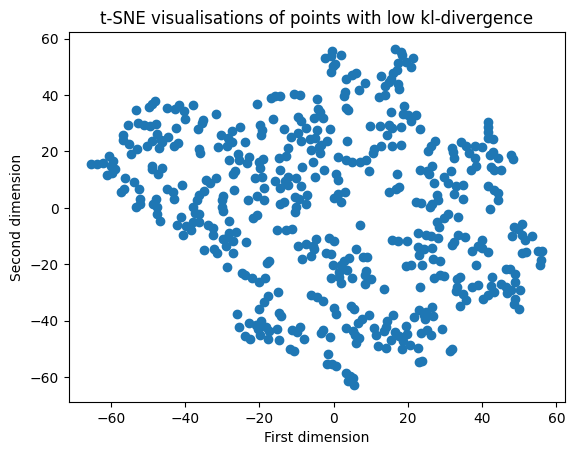

In [208]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
top_true_latent = np.array(top_ten.loc[:]["true-latent"].tolist())
top_pred_latent = np.array(top_ten.loc[:]["predicted-latent"].tolist())
top_latents = np.hstack((top_true_latent, top_pred_latent))
tsne = TSNE(n_components=2, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(top_latents)
top_ten_2d = top_ten.copy()
top_ten_2d["2d-latent-first"] = latent_tsne[:,0]
top_ten_2d["2d-latent-second"] = latent_tsne[:,1]
plt.scatter(top_ten_2d["2d-latent-first"], top_ten_2d["2d-latent-second"])
plt.title("t-SNE visualisations of points with low kl-divergence")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()


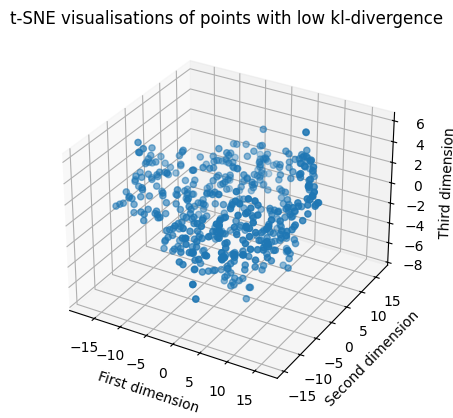

In [209]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
top_true_latent = np.array(top_ten.loc[:]["true-latent"].tolist())
top_pred_latent = np.array(top_ten.loc[:]["predicted-latent"].tolist())
top_latents = np.hstack((top_true_latent, top_pred_latent))
tsne = TSNE(n_components=3, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(top_latents)
top_ten_3d = top_ten.copy()
top_ten_3d["3d-latent-first"] = latent_tsne[:,0]
top_ten_3d["3d-latent-second"] = latent_tsne[:,1]
top_ten_3d["3d-latent-third"] = latent_tsne[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(top_ten_3d["3d-latent-first"],top_ten_3d["3d-latent-second"],top_ten_3d["3d-latent-third"])
plt.title("t-SNE visualisations of points with low kl-divergence")
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_zlabel("Third dimension")
plt.show()

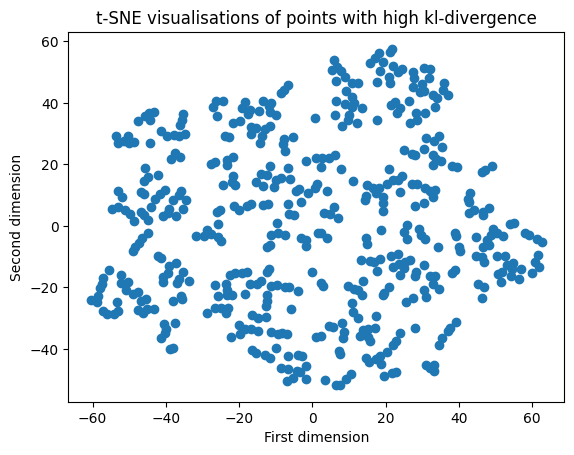

In [210]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
bot_true_latent = np.array(bottom_ten.loc[:]["true-latent"].tolist())
bot_pred_latent = np.array(bottom_ten.loc[:]["predicted-latent"].tolist())
bot_latents = np.hstack((bot_true_latent, bot_pred_latent))
tsne = TSNE(n_components=2, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(bot_latents)
bot_ten_2d = top_ten.copy()
bot_ten_2d["2d-latent-first"] = latent_tsne[:,0]
bot_ten_2d["2d-latent-second"] = latent_tsne[:,1]
plt.scatter(bot_ten_2d["2d-latent-first"], bot_ten_2d["2d-latent-second"])
plt.title("t-SNE visualisations of points with high kl-divergence")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()



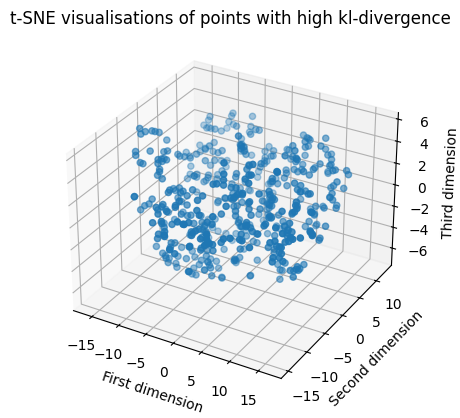

In [211]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
bot_true_latent = np.array(bottom_ten.loc[:]["true-latent"].tolist())
bot_pred_latent = np.array(bottom_ten.loc[:]["predicted-latent"].tolist())
bot_latents = np.hstack((bot_true_latent, bot_pred_latent))
tsne = TSNE(n_components=3, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(bot_latents)
bot_ten_3d = bottom_ten.copy()
bot_ten_3d["3d-latent-first"] = latent_tsne[:,0]
bot_ten_3d["3d-latent-second"] = latent_tsne[:,1]
bot_ten_3d["3d-latent-third"] = latent_tsne[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bot_ten_3d["3d-latent-first"],bot_ten_3d["3d-latent-second"],bot_ten_3d["3d-latent-third"])
plt.title("t-SNE visualisations of points with high kl-divergence")
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_zlabel("Third dimension")
plt.show()